In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
import keras.backend.tensorflow_backend as K
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import sys

print('Python version : ', sys.version)
print('Keras version : ', keras.__version__)

Using TensorFlow backend.


Python version :  3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Keras version :  2.2.4


## 데이터 불러오기

In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 256
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_pretrain = y_train[:59000]
y_training = y_train[59000:]
len(y_pretrain)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


59000

In [3]:
x_pretrain = x_train[:59000]
x_training = x_train[59000:]
print(x_pretrain.shape[0], 'pretrain samples')
print(x_training.shape[0], 'train samples')

59000 pretrain samples
1000 train samples


## training model 만들기

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape = (28,28,1)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu', input_shape = (28,28,1)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu', input_shape = (28,28,1)))
    model.add(layers.MaxPool2D(2,2))
    model.add(Dropout(0.25))    
    model.add(layers.Flatten())
    model.add(Dense(200, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
        
    model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
    model.summary()
    return model

In [5]:
with K.tf.device("/gpu:0"):
    model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [6]:
hist = model.fit(x_pretrain, y_pretrain, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 59000 samples, validate on 10000 samples
Epoch 1/12
59000/59000 [==============================] - 66s 1ms/step - loss: 2.2686 - acc: 0.1824 - val_loss: 2.2037 - val_acc: 0.6384
Epoch 2/12
59000/59000 [==============================] - 78s 1ms/step - loss: 2.1493 - acc: 0.3719 - val_loss: 2.0208 - val_acc: 0.7623
Epoch 3/12
59000/59000 [==============================] - 78s 1ms/step - loss: 1.9457 - acc: 0.4806 - val_loss: 1.7264 - val_acc: 0.7825
Epoch 4/12
59000/59000 [==============================] - 77s 1ms/step - loss: 1.6672 - acc: 0.5490 - val_loss: 1.3483 - val_acc: 0.8032
Epoch 5/12
59000/59000 [==============================] - 79s 1ms/step - loss: 1.3653 - acc: 0.6152 - val_loss: 1.0001 - val_acc: 0.8266
Epoch 6/12
59000/59000 [==============================] - 81s 1ms/step - loss: 1.1102 - acc: 0.6733 - val_loss: 0.7471 - val_acc: 0.8556
Epoch 7/12
59000/59000 [==============================] - 78s 1ms/step - loss: 0

In [7]:
hist = model.fit(x_pretrain, y_pretrain, batch_size=batch_size, epochs=13, validation_data=(x_test, y_test))

Train on 59000 samples, validate on 10000 samples
Epoch 1/13
59000/59000 [==============================] - 76s 1ms/step - loss: 0.4132 - acc: 0.8739 - val_loss: 0.2323 - val_acc: 0.9389
Epoch 2/13
59000/59000 [==============================] - 74s 1ms/step - loss: 0.3796 - acc: 0.8861 - val_loss: 0.2134 - val_acc: 0.9425
Epoch 3/13
59000/59000 [==============================] - 74s 1ms/step - loss: 0.3504 - acc: 0.8942 - val_loss: 0.1959 - val_acc: 0.9463
Epoch 4/13
59000/59000 [==============================] - 74s 1ms/step - loss: 0.3245 - acc: 0.9009 - val_loss: 0.1818 - val_acc: 0.9497
Epoch 5/13
59000/59000 [==============================] - 74s 1ms/step - loss: 0.3040 - acc: 0.9078 - val_loss: 0.1702 - val_acc: 0.9520
Epoch 6/13
59000/59000 [==============================] - 78s 1ms/step - loss: 0.2868 - acc: 0.9137 - val_loss: 0.1604 - val_acc: 0.9533
Epoch 7/13
59000/59000 [==============================] - 77s 1ms/step - loss: 0.2726 - acc: 0.9183 - val_loss: 0.1519 - val_acc

In [8]:
model.save_weights("CNN.h5")
model_json = model.to_json()
with open("CNN.json", "w") as json_file : 
    json_file.write(model_json)

In [9]:
model.save("CNN2.h5")

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1165217472486198
Test accuracy: 0.9652


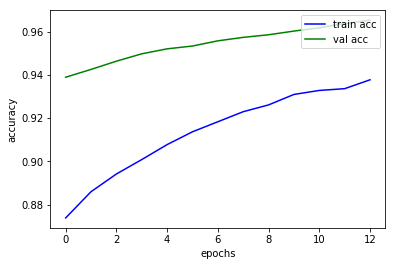

In [11]:
fig, acc_ax = plt.subplots()

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

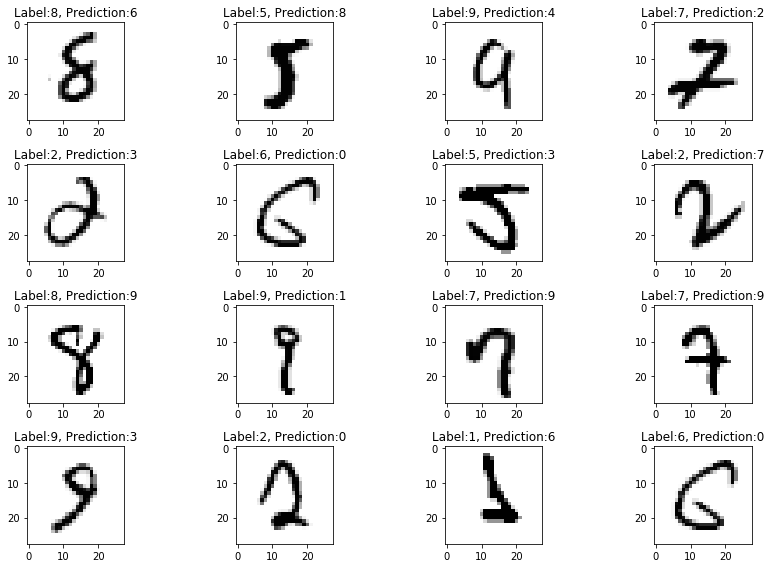

In [12]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## small dataset에 대해 학습시키기

In [13]:
from keras.models import model_from_json
json_file = open("CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model2 = model_from_json(loaded_model_json)
model2.load_weights("CNN.h5")

In [31]:
#model2 = load_model('CNN2.h5')
#score = model2.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [14]:
model2.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
hist2 = model2.fit(x_training, y_training, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1997 - acc: 0.9490 - val_loss: 0.1171 - val_acc: 0.9644
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1685 - acc: 0.9570 - val_loss: 0.1175 - val_acc: 0.9640
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1925 - acc: 0.9480 - val_loss: 0.1181 - val_acc: 0.9637
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1788 - acc: 0.9550 - val_loss: 0.1182 - val_acc: 0.9637
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1793 - acc: 0.9550 - val_loss: 0.1187 - val_acc: 0.9636
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1783 - acc: 0.9580 - val_loss: 0.1190 - val_acc: 0.9628
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1928 - acc: 0.9530 - val_loss: 0.1192 - val_acc: 0.9625
Epoch 

Epoch 61/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1604 - acc: 0.9610 - val_loss: 0.1213 - val_acc: 0.9630
Epoch 62/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1442 - acc: 0.9720 - val_loss: 0.1217 - val_acc: 0.9629
Epoch 63/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1354 - acc: 0.9670 - val_loss: 0.1216 - val_acc: 0.9625
Epoch 64/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1555 - acc: 0.9600 - val_loss: 0.1216 - val_acc: 0.9627
Epoch 65/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1594 - acc: 0.9600 - val_loss: 0.1221 - val_acc: 0.9627
Epoch 66/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1489 - acc: 0.9640 - val_loss: 0.1226 - val_acc: 0.9620
Epoch 67/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1534 - acc: 0.9640 - val_loss: 0.1228 - val_acc: 0.9621
Epoch 68/100
1000/1000 [========================

Test loss: 0.12407241296730935
Test accuracy: 0.9612


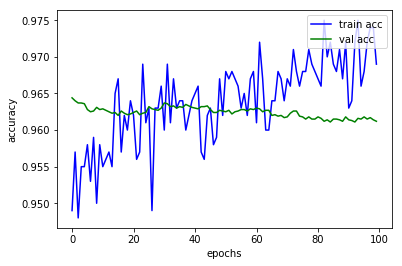

In [15]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')

acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

## freezing 시킨 후 학습 시키기

In [16]:
from keras.models import model_from_json
json_file = open("CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model3 = model_from_json(loaded_model_json)
model3.load_weights("CNN2.h5")

In [17]:
for layer in model3.layers[:7]:
    layer.trainable = False
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [18]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])
hist3 = model3.fit(x_training, y_training, batch_size=batch_size, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1761 - acc: 0.9600 - val_loss: 0.1164 - val_acc: 0.9649
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1915 - acc: 0.9550 - val_loss: 0.1165 - val_acc: 0.9652
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1890 - acc: 0.9580 - val_loss: 0.1166 - val_acc: 0.9648
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1894 - acc: 0.9510 - val_loss: 0.1166 - val_acc: 0.9646
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1952 - acc: 0.9480 - val_loss: 0.1167 - val_acc: 0.9647
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1856 - acc: 0.9550 - val_loss: 0.1168 - val_acc: 0.9643
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1709 - acc: 0.9580 - val_loss: 0.1168 - val_acc: 0.9641
Epoch 

Epoch 61/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1579 - acc: 0.9620 - val_loss: 0.1204 - val_acc: 0.9623
Epoch 62/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1691 - acc: 0.9570 - val_loss: 0.1206 - val_acc: 0.9625
Epoch 63/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1509 - acc: 0.9680 - val_loss: 0.1204 - val_acc: 0.9623
Epoch 64/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1611 - acc: 0.9570 - val_loss: 0.1204 - val_acc: 0.9624
Epoch 65/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1814 - acc: 0.9530 - val_loss: 0.1206 - val_acc: 0.9622
Epoch 66/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1492 - acc: 0.9620 - val_loss: 0.1208 - val_acc: 0.9622
Epoch 67/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1517 - acc: 0.9640 - val_loss: 0.1208 - val_acc: 0.9623
Epoch 68/100
1000/1000 [========================

Test loss: 0.12157734015360475
Test accuracy: 0.9619


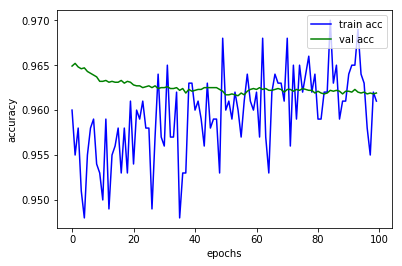

In [19]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

## pre train없이 학습시켜보기

In [20]:
model4 = build_model()
hist4 = model4.fit(x_training, y_training, batch_size=batch_size, epochs=100, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 128)         0         
__________

Epoch 48/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2159 - acc: 0.2770 - val_loss: 2.2198 - val_acc: 0.4040
Epoch 49/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2172 - acc: 0.2720 - val_loss: 2.2177 - val_acc: 0.4211
Epoch 50/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2138 - acc: 0.3020 - val_loss: 2.2155 - val_acc: 0.4296
Epoch 51/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2091 - acc: 0.2900 - val_loss: 2.2133 - val_acc: 0.4435
Epoch 52/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2100 - acc: 0.3040 - val_loss: 2.2111 - val_acc: 0.4519
Epoch 53/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2045 - acc: 0.3110 - val_loss: 2.2088 - val_acc: 0.4605
Epoch 54/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2071 - acc: 0.2830 - val_loss: 2.2067 - val_acc: 0.4691
Epoch 55/100
1000/1000 [========================

Test loss: 2.068624049758911
Test accuracy: 0.6683


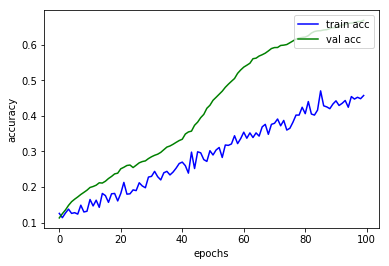

In [21]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

C:\Users\kim77\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\kim77\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
C:\Users\kim77\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "under right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


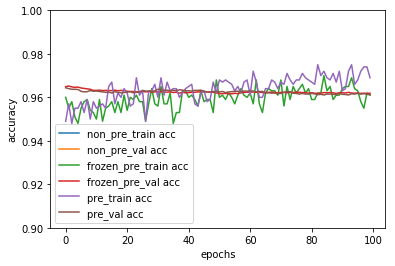

In [22]:
fig, acc_ax = plt.subplots()

acc_ax.plot(hist4.history['acc'],  label='non_pre_train acc')
acc_ax.plot(hist4.history['val_acc'],  label='non_pre_val acc')
acc_ax.plot(hist3.history['acc'],  label='frozen_pre_train acc')
acc_ax.plot(hist3.history['val_acc'],  label='frozen_pre_val acc')
acc_ax.plot(hist2.history['acc'],  label='pre_train acc')
acc_ax.plot(hist2.history['val_acc'],  label='pre_val acc')

plt.ylim(ymax = 1, ymin = 0.9)
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='under right')

plt.show()

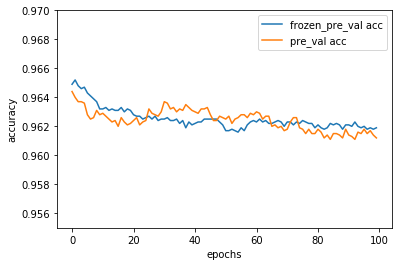

In [26]:
fig, acc_ax = plt.subplots()

#acc_ax.plot(hist4.history['acc'],  label='non_pre_train acc')
#acc_ax.plot(hist4.history['val_acc'],  label='non_pre_val acc')
#acc_ax.plot(hist3.history['acc'],  label='frozen_pre_train acc')
acc_ax.plot(hist3.history['val_acc'],  label='frozen_pre_val acc')
#acc_ax.plot(hist2.history['acc'],  label='pre_train acc')
acc_ax.plot(hist2.history['val_acc'],  label='pre_val acc')

plt.ylim(ymax = 0.97, ymin = 0.955)
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='under right')

plt.show()

In [27]:
hist3 = model3.fit(x_training, y_training, batch_size=batch_size, epochs=400, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1518 - acc: 0.9590 - val_loss: 0.1215 - val_acc: 0.9620
Epoch 2/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1542 - acc: 0.9650 - val_loss: 0.1214 - val_acc: 0.9620
Epoch 3/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1440 - acc: 0.9620 - val_loss: 0.1213 - val_acc: 0.9620
Epoch 4/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1468 - acc: 0.9630 - val_loss: 0.1216 - val_acc: 0.9621
Epoch 5/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1593 - acc: 0.9570 - val_loss: 0.1216 - val_acc: 0.9621
Epoch 6/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1436 - acc: 0.9690 - val_loss: 0.1218 - val_acc: 0.9621
Epoch 7/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1367 - acc: 0.9670 - val_loss: 0.1217 - val_acc: 0.9621
Epoch 

Epoch 61/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1256 - acc: 0.9680 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 62/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1415 - acc: 0.9690 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 63/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1350 - acc: 0.9680 - val_loss: 0.1232 - val_acc: 0.9618
Epoch 64/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1257 - acc: 0.9700 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 65/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1242 - acc: 0.9710 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 66/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1363 - acc: 0.9680 - val_loss: 0.1232 - val_acc: 0.9618
Epoch 67/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1429 - acc: 0.9620 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 68/400
1000/1000 [========================

1000/1000 [==============================] - 4s 4ms/step - loss: 0.1146 - acc: 0.9730 - val_loss: 0.1248 - val_acc: 0.9611
Epoch 122/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1244 - acc: 0.9710 - val_loss: 0.1249 - val_acc: 0.9611
Epoch 123/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1171 - acc: 0.9720 - val_loss: 0.1251 - val_acc: 0.9611
Epoch 124/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1277 - acc: 0.9720 - val_loss: 0.1253 - val_acc: 0.9613
Epoch 125/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1302 - acc: 0.9680 - val_loss: 0.1252 - val_acc: 0.9612
Epoch 126/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1277 - acc: 0.9730 - val_loss: 0.1253 - val_acc: 0.9610
Epoch 127/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1226 - acc: 0.9700 - val_loss: 0.1252 - val_acc: 0.9609
Epoch 128/400
1000/1000 [==============================

Epoch 181/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1266 - acc: 0.9670 - val_loss: 0.1261 - val_acc: 0.9605
Epoch 182/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1243 - acc: 0.9650 - val_loss: 0.1262 - val_acc: 0.9607
Epoch 183/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1292 - acc: 0.9640 - val_loss: 0.1259 - val_acc: 0.9607
Epoch 184/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1151 - acc: 0.9740 - val_loss: 0.1260 - val_acc: 0.9607
Epoch 185/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1210 - acc: 0.9700 - val_loss: 0.1262 - val_acc: 0.9608
Epoch 186/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1039 - acc: 0.9740 - val_loss: 0.1263 - val_acc: 0.9606
Epoch 187/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1109 - acc: 0.9730 - val_loss: 0.1265 - val_acc: 0.9605
Epoch 188/400
1000/1000 [================

Epoch 241/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1112 - acc: 0.9690 - val_loss: 0.1279 - val_acc: 0.9599
Epoch 242/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0930 - acc: 0.9830 - val_loss: 0.1281 - val_acc: 0.9597
Epoch 243/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1177 - acc: 0.9720 - val_loss: 0.1281 - val_acc: 0.9602
Epoch 244/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1075 - acc: 0.9720 - val_loss: 0.1283 - val_acc: 0.9600
Epoch 245/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1180 - acc: 0.9720 - val_loss: 0.1283 - val_acc: 0.9599
Epoch 246/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1079 - acc: 0.9710 - val_loss: 0.1284 - val_acc: 0.9598
Epoch 247/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1133 - acc: 0.9690 - val_loss: 0.1284 - val_acc: 0.9598
Epoch 248/400
1000/1000 [================

Epoch 301/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0951 - acc: 0.9740 - val_loss: 0.1292 - val_acc: 0.9595
Epoch 302/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1074 - acc: 0.9770 - val_loss: 0.1291 - val_acc: 0.9595
Epoch 303/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0998 - acc: 0.9720 - val_loss: 0.1290 - val_acc: 0.9596
Epoch 304/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1111 - acc: 0.9730 - val_loss: 0.1292 - val_acc: 0.9594
Epoch 305/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0923 - acc: 0.9770 - val_loss: 0.1292 - val_acc: 0.9594
Epoch 306/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0906 - acc: 0.9770 - val_loss: 0.1292 - val_acc: 0.9594
Epoch 307/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1031 - acc: 0.9740 - val_loss: 0.1293 - val_acc: 0.9596
Epoch 308/400
1000/1000 [================

Epoch 361/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0938 - acc: 0.9820 - val_loss: 0.1298 - val_acc: 0.9595
Epoch 362/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1068 - acc: 0.9690 - val_loss: 0.1302 - val_acc: 0.9594
Epoch 363/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0941 - acc: 0.9750 - val_loss: 0.1301 - val_acc: 0.9594
Epoch 364/400
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1060 - acc: 0.9760 - val_loss: 0.1303 - val_acc: 0.9597
Epoch 365/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0928 - acc: 0.9710 - val_loss: 0.1303 - val_acc: 0.9594
Epoch 366/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0822 - acc: 0.9810 - val_loss: 0.1302 - val_acc: 0.9596
Epoch 367/400
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0908 - acc: 0.9750 - val_loss: 0.1302 - val_acc: 0.9597
Epoch 368/400
1000/1000 [================

Test loss: 0.1313145476922393
Test accuracy: 0.9596


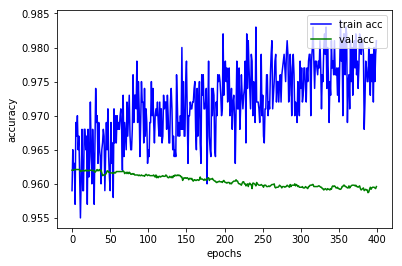

In [28]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

## optimizer 바꿔서 돌려보기

In [6]:
from keras.models import model_from_json
json_file = open("CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model2_1 = model_from_json(loaded_model_json)
model2_1.load_weights("CNN.h5")

In [7]:
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
hist2_1 = model2_1.fit(x_training, y_training, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4185 - acc: 0.8890 - val_loss: 0.2250 - val_acc: 0.9332
Epoch 2/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2500 - acc: 0.9280 - val_loss: 0.1978 - val_acc: 0.9415
Epoch 3/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1692 - acc: 0.9560 - val_loss: 0.1742 - val_acc: 0.9488
Epoch 4/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1547 - acc: 0.9580 - val_loss: 0.2093 - val_acc: 0.9340
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1224 - acc: 0.9700 - val_loss: 0.1652 - val_acc: 0.9497
Epoch 6/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0938 - acc: 0.9780 - val_loss: 0.1876 - val_acc: 0.9432
Epoch 7/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0939 - acc: 0.9760 - val_loss: 0.1678 - val_acc: 0.9507
Epoch 

Epoch 61/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2621 - val_acc: 0.9472
Epoch 62/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0107 - acc: 0.9970 - val_loss: 0.2504 - val_acc: 0.9457
Epoch 63/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0139 - acc: 0.9970 - val_loss: 0.2628 - val_acc: 0.9419
Epoch 64/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0121 - acc: 0.9960 - val_loss: 0.2581 - val_acc: 0.9407
Epoch 65/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0087 - acc: 0.9980 - val_loss: 0.2440 - val_acc: 0.9449
Epoch 66/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0089 - acc: 0.9980 - val_loss: 0.2865 - val_acc: 0.9364
Epoch 67/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.2507 - val_acc: 0.9456
Epoch 68/100
1000/1000 [========================

Test loss: 0.26089148870075585
Test accuracy: 0.9435


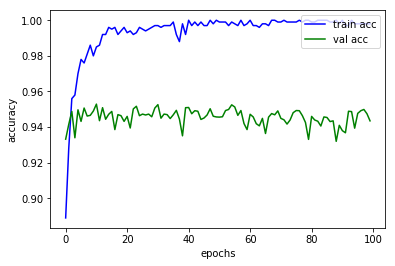

In [8]:
score = model2_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist2_1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2_1.history['val_acc'], 'g', label='val acc')

acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()

In [9]:
from keras.models import model_from_json
json_file = open("CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model3_1 = model_from_json(loaded_model_json)
model3_1.load_weights("CNN2.h5")

In [10]:
for layer in model3_1.layers[:7]:
    layer.trainable = False
model3_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [12]:
model3_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist3_1 = model3_1.fit(x_training, y_training, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2475 - acc: 0.9380 - val_loss: 0.1674 - val_acc: 0.9494
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1928 - acc: 0.9490 - val_loss: 0.1493 - val_acc: 0.9529
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1608 - acc: 0.9580 - val_loss: 0.1733 - val_acc: 0.9465
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1707 - acc: 0.9640 - val_loss: 0.1474 - val_acc: 0.9532
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1236 - acc: 0.9680 - val_loss: 0.1576 - val_acc: 0.9513
Epoch 6/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1206 - acc: 0.9700 - val_loss: 0.1516 - val_acc: 0.9536
Epoch 7/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0980 - acc: 0.9700 - val_loss: 0.1609 - val_acc: 0.9498
Epoch 

Epoch 61/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.2356 - val_acc: 0.9409
Epoch 62/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0131 - acc: 0.9970 - val_loss: 0.2296 - val_acc: 0.9418
Epoch 63/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0137 - acc: 0.9960 - val_loss: 0.2048 - val_acc: 0.9486
Epoch 64/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0139 - acc: 0.9960 - val_loss: 0.2042 - val_acc: 0.9494
Epoch 65/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0117 - acc: 0.9970 - val_loss: 0.2168 - val_acc: 0.9458
Epoch 66/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0184 - acc: 0.9940 - val_loss: 0.2474 - val_acc: 0.9392
Epoch 67/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0131 - acc: 0.9970 - val_loss: 0.1950 - val_acc: 0.9492
Epoch 68/100
1000/1000 [========================

Test loss: 0.20674141504480503
Test accuracy: 0.9506


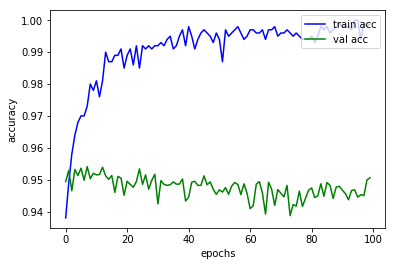

In [13]:
score = model3_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, acc_ax = plt.subplots()

acc_ax.plot(hist3_1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3_1.history['val_acc'], 'g', label='val acc')

acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.legend(loc='upper right')

plt.show()